In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl
import matplotlib.ticker as ticker
import pickle
import joblib

In [2]:
path = r'/Users/Andy/Documents/Instacart Basket Analysis/'

In [3]:
path

'/Users/Andy/Documents/Instacart Basket Analysis/'

In [4]:
df_ords_customers = pd.read_pickle(os.path.join(path, '02 Data/Prepared Data/ords_prods_customers_left.pkl'))

In [5]:
df_ords_customers.shape

(32404859, 30)

In [6]:
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float32
 5   order_id                int64  
 6   user_id                 object 
 7   eval_set                object 
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  hour_of_day_ordered     int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  max_order               int64  
 15  loyalty_flag            object 
 16  average_price           float64
 17  spending_flag           object 
 18  median_orders           float64
 19  order_frequency_flag    object 
 20  mean_expenses           float32
 21  first_name              objec

### 2.1 Analyse Orders Day of Week

In [7]:
df_ords_customers.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,mean_expenses,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
32404854,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,prior,2,0,...,13.5,Robin,Ward,Female,Rhode Island,47,9/13/2017,1,married,166687
32404855,49688,Fresh Foaming Cleanser,73,11,13.5,3401313,200377,prior,1,4,...,13.5,Albert,Hancock,Male,West Virginia,25,3/16/2020,0,single,53936
32404856,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,prior,5,3,...,13.5,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649
32404857,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,prior,9,3,...,13.5,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649
32404858,49688,Fresh Foaming Cleanser,73,11,13.5,2385091,205926,prior,11,1,...,13.5,Kimberly,Anderson,Female,Pennsylvania,34,2/25/2017,2,married,56331


In [8]:
df_ords_customers['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

## Day of the week distribution

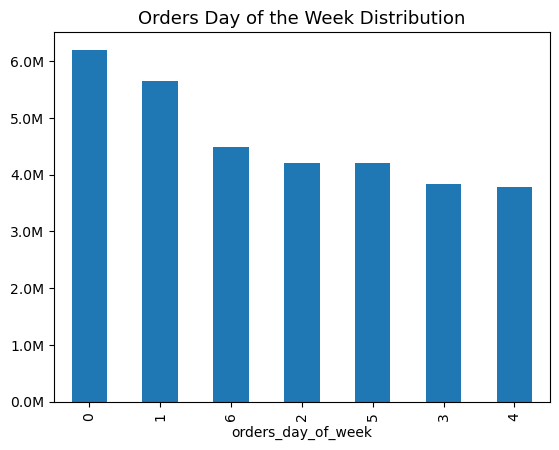

In [9]:
plt.title('Orders Day of the Week Distribution', fontsize=13)
ax=df_ords_customers['orders_day_of_week'].value_counts().plot.bar()

ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.1f')+'M'))

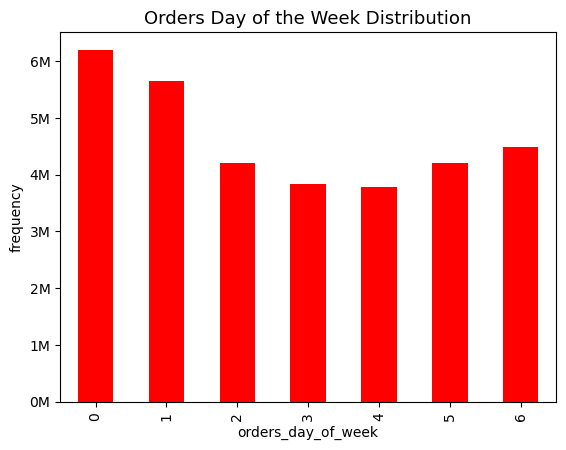

In [10]:
plt.title('Orders Day of the Week Distribution', fontsize=13)
bar_odow = df_ords_customers['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['red'], x='orders days of the week', ylabel='frequency')
bar_odow.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))


In [11]:
bar_odow.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_orders_dow.png'))

In [12]:
df_ords_customers['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956459e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
df_ords_customers.loc[df_ords_customers['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,mean_expenses,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,14900.0,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,14900.0,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,14900.0,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,14900.0,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,14900.0,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,99999.0,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,99999.0,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,99999.0,Shirley,Ellis,Female,Missouri,78,11/9/2019,3,married,137004
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,99999.0,Victor,Rivers,Male,Arizona,78,8/9/2018,3,married,294898


In [14]:
df_ords_customers.loc[df_ords_customers['prices'] >100, 'prices'] = np.nan

In [15]:
df_ords_customers['prices'].max()

25.0

In [16]:
df_ords_customers['prices'].describe()

count    3.239973e+07
mean     7.791005e+00
std      4.088904e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

## Price Distribution

<Axes: ylabel='Frequency'>

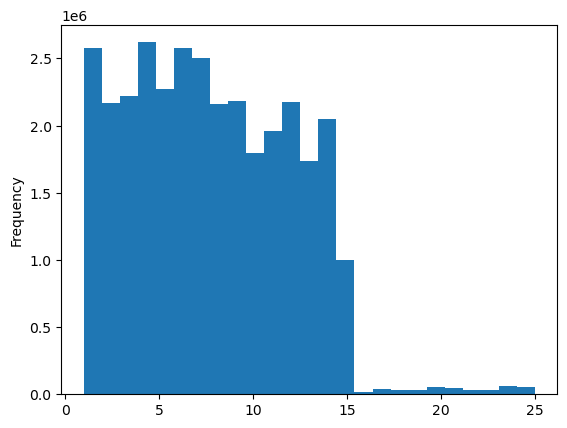

In [17]:
df_ords_customers['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

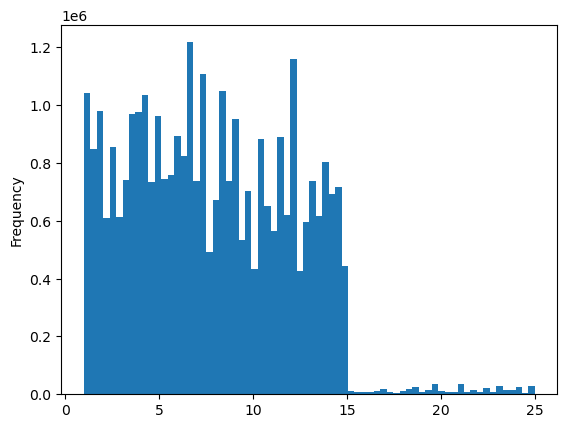

In [18]:
df_ords_customers['prices'].plot.hist(bins = 70)

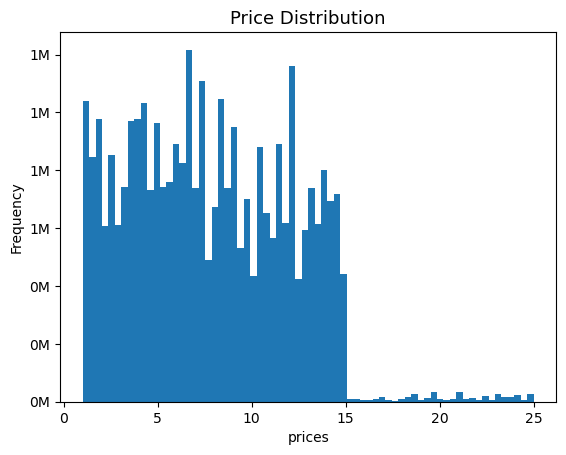

In [19]:
bar_prices = df_ords_customers['prices'].plot.hist(bins=70, xlabel='prices')
plt.title('Price Distribution', fontsize=13)
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.0f')+'M'))

In [20]:
bar_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/prices_hist.png'))

In [21]:
np.random.seed(4)

In [22]:
dev = np.random.rand(len(df_ords_customers)) <= 0.7

In [23]:
big = df_ords_customers[dev]

In [24]:
small = df_ords_customers[~dev]

In [25]:
big_len = len(big)

In [26]:
small_len = len(small)


In [27]:
big_len + small_len

32404859

In [28]:
df_2 = small[['orders_day_of_week','prices']]

In [29]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


## Days of the week distribution

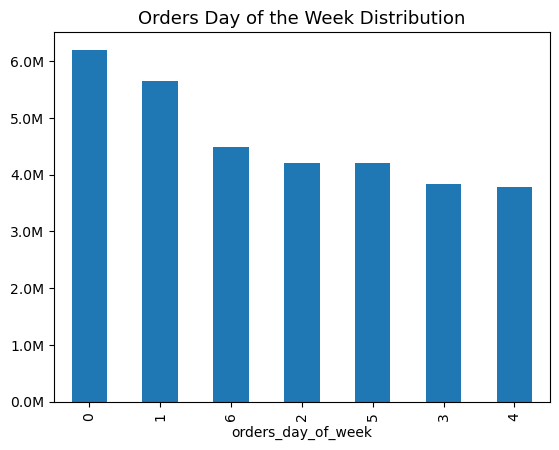

In [30]:
plt.title('Orders Day of the Week Distribution', fontsize=13)
ax=df_ords_customers['orders_day_of_week'].value_counts().plot.bar()
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.1f')+'M'))

In [31]:
df_ords_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,mean_expenses,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,5.8,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,5.8,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,5.8,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,5.8,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,5.8,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


## Prices Distribution

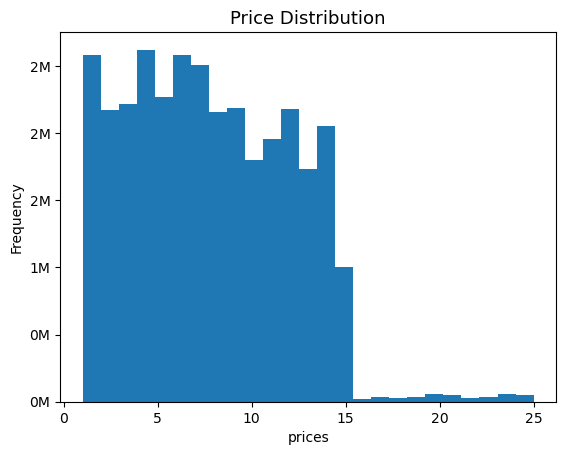

In [32]:
hist_ohoy = plt.title('Price Distribution', fontsize=13)
bar_prices = df_ords_customers['prices'].plot.hist(bins=25, xlabel='prices')
bar_prices.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000, '1.0f')+'M'))

In [33]:
hist_ohoy.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_orders_hours_distribution.png'))

In [34]:
hist_ohoy = df_ords_customers['hour_of_day_ordered'].value_counts()


## Count of orders by loyalty flag

In [35]:
print(df_ords_customers.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'hour_of_day_ordered', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_orders', 'order_frequency_flag',
       'mean_expenses', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')


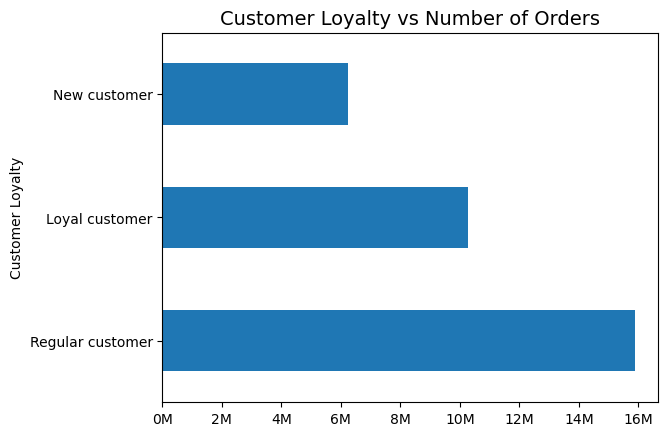

In [36]:
# horizontal bar graph loyalty flag vs count of orders per loyalty flag
bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.barh(ylabel="Customer Loyalty", x="Number of Orders")

plt.title("Customer Loyalty vs Number of Orders", fontsize=14)
bar_loyal.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

Regular customers have more orders than loyal customers.

In [37]:
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_loyalty_flag_distribution.png'))

In [38]:
df_ords_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [39]:
# extracting relevant columns and checking the dataframe
df_small_ohod_prices = small[['hour_of_day_ordered', 'prices']]
df_small_ohod_prices.head()

,hour_of_day_ordered,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


## Order hour vs prices Distribution

C:\Users\Andy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


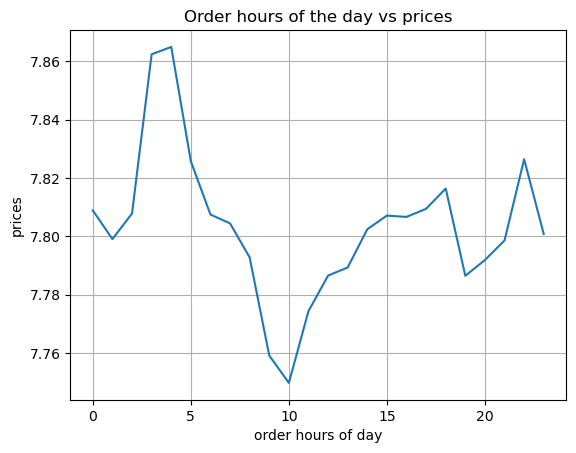

In [40]:
# Create a line graph to check correlation between order hours and prices
line_ohod_prices = sns.lineplot(data=df_small_ohod_prices, x='hour_of_day_ordered', y='prices', errorbar=None)
line_ohod_prices.set(xlabel='order hours of day')
plt.title('Order hours of the day vs prices')
plt.grid()

In [41]:
line_ohod_prices.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_order_hours_vs_prices.png'))

In [42]:
df_age_dependants = df_ords_customers[['age','n_dependants']]

In [43]:
df_age_dependants.head()

,age,n_dependants
0,81,1
1,81,1
2,66,2
3,40,3
4,40,3


## Age vs No of Dependants

C:\Users\Andy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


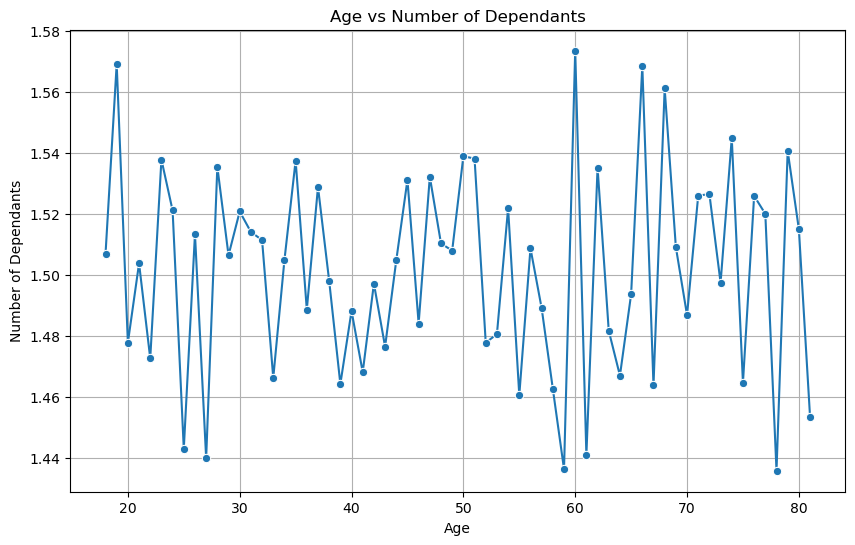

In [44]:
plt.figure(figsize=(10, 6))
line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants', marker='o', errorbar=None)
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.title('Age vs Number of Dependants')
plt.grid(True)
plt.show()


In [45]:
line_age_ndependants.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/line_age_ndependants.png'))

## Number of customers by family status 

In [46]:
# extract fam_status and user_id into separate dataframe
df_fam_status_dependants = df_ords_customers[['fam_status','user_id']]
df_fam_status_dependants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   fam_status  object
 1   user_id     object
dtypes: object(2)
memory usage: 494.5+ MB


In [47]:
## Count unique users per fam_status
fam_users_no = df_fam_status_dependants.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique'})
fam_users_no

,fam_status,user_id
0,divorced/widowed,17640
1,living with parents and siblings,9701
2,married,144906
3,single,33962


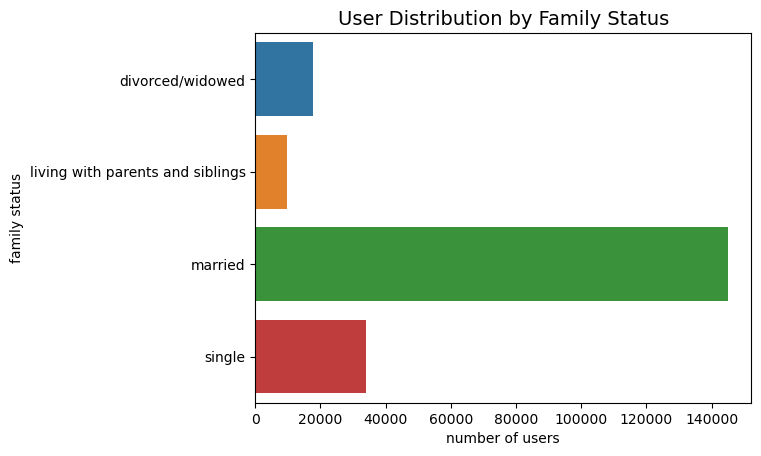

<Figure size 900x1100 with 0 Axes>

In [48]:
# Create a bar graph to show the user distribution based on family status
bar_fam_users = sns.barplot(y='fam_status', x='user_id', data=fam_users_no, errorbar=None)
bar_fam_users.set(ylabel='family status', xlabel='number of users')
plt.title('User Distribution by Family Status', fontsize=14)
fig = plt.figure(figsize=(9, 11))

This graph tells us that Marrid customers are more likely to have a bigger income. I reccomend to target married couples/individuals for better sales as well as singles.

In [49]:
bar_fam_users.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_fam_users.png'), bbox_inches = 'tight')

In [50]:
# Extract age and income into a separate dataframe
df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

,age,income
0,81,49620
1,81,49620
2,66,158302
3,40,31308
4,40,31308


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

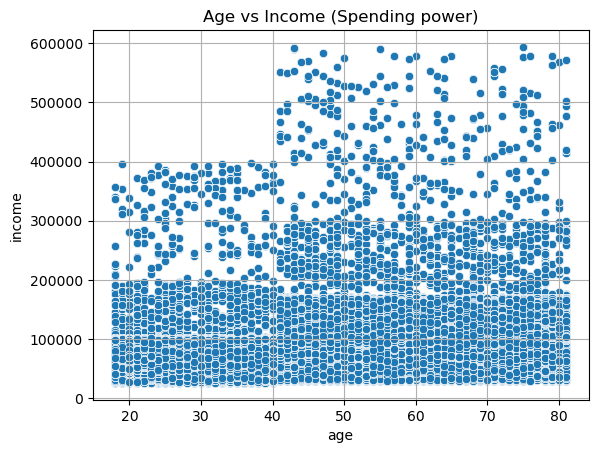

In [51]:

# Create a scatterplot to see the correlation between age and income
scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age vs Income (Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

From the graph it represents our customers who are 40 and over are the ones who will spend the most due to them having a higher income. 

In [52]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/scatter_age_income.png'))

## Income Distribution

In [53]:
df_income = df_ords_customers[['income']]
df_income.head()

,income
0,49620
1,49620
2,158302
3,31308
4,31308


## Order Distribution Throughout the Day

In [54]:
df_hour_orders = df_ords_customers[['hour_of_day_ordered', 'median_orders']]
df_hour_orders.head()

,hour_of_day_ordered,median_orders
0,11,8.0
1,17,8.0
2,21,8.0
3,13,9.0
4,17,9.0


C:\Users\Andy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


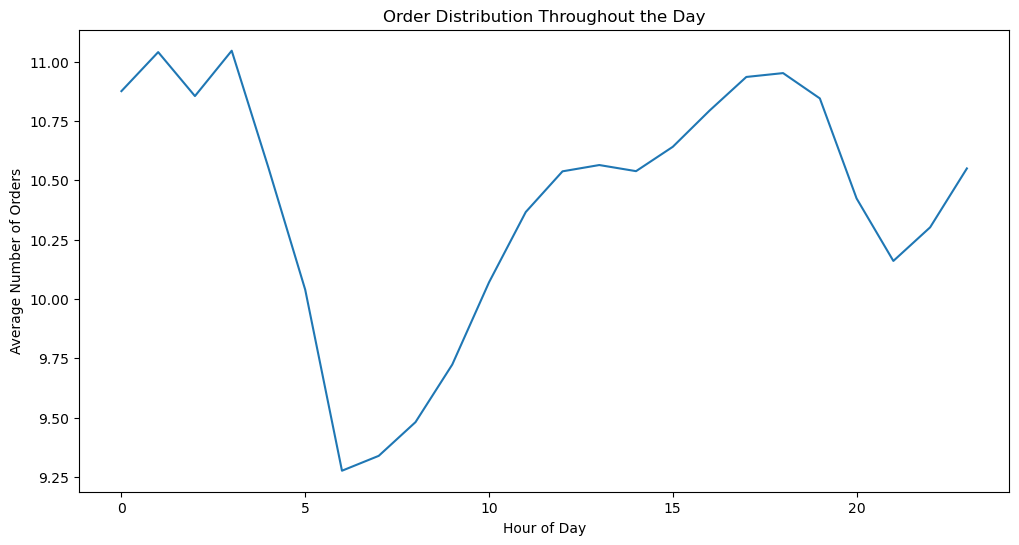

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day_ordered', y='median_orders', data=df_hour_orders, errorbar=None)
plt.title('Order Distribution Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Orders')
plt.show()

This chart represent that before 5:00 am is when Instacart receives the most orders.

In [56]:
df_ords_customers.to_pickle(os.path.join(path, '02 Data\Prepared Data/insta_cleaned.pkl'))